In [1]:
# represent objects of F*
class FF:

    def __init__(self, trees):
        # Assign the trees argument to an instance variable called trees
        self.trees = trees

    def __iter__(self):
        # Use the iter() function to create an iterator object from the list of trees
        return iter(self.trees)
    
    def __add__(self, other):
        # Call the sum_ff function on the two input instances
        return sum_ff(self, other)
    
    def __eq__(self, other):
        # Check if the other object is an instance of the FF class
        if isinstance(other, FF):
            # Compare the trees instance variable of both objects using the == operator
            return self.trees == other.trees
        # If the other object is not an instance of the FF class, return False
        return False
    
    def __iadd__(self, other):
        # Check if the other object is an instance of the FF class
        if isinstance(other, FF):
            # Create a new list of trees by concatenating the trees from self and other
            new_trees = self.trees + other.trees
            # Update the trees instance variable of the self object with the new list of trees
            self.trees = new_trees
        # Return the updated self object
        return self
    
    def __mul__(self, other):
        # Check if the other object is an instance of the FF class
        if isinstance(other, FF):
            # Call the prod_ff function with self and other as arguments and return the result
            return prod_ff(self, other)
        # If the other object is not an instance of the FF class, return NotImplemented
        return NotImplemented

In [2]:
def tree_length(tree):
    # Base case: if the tree is empty, return 0
    if not tree:
        return 0
    # Recursive case: return 1 plus the sum of the lengths of the subtrees
    return 1 + sum(tree_length(subtree) for subtree in tree.values())

In [3]:
def print_tree_lengths(ff):
    for i, tree in enumerate(ff.trees):
        length = tree_length(tree)
        print(f"Tree {i+1}: {length}")

In [4]:
from pprint import pprint

def display_trees(ff):
    # Iterate over the trees in the FF object
    for tree in ff:
        # Call the pprint function to pretty-print the tree
        pprint(tree)
        


In [5]:
def str_list_tree(t, prefix = ""):
    for k, v in t.items():
        yield prefix + "-\t" + k
        for line in str_list_tree(v, prefix + "|\t"):
            yield line
    return
        
def str_tree(t):
    return ".\n" + "\n".join(str_list_tree(t, " "))

def str_finite_forest(ff):
    return "\n".join(map(str_tree, ff))


In [6]:
# tree objects are represented as nested dictionaries, 
# where the keys represent the names of the nodes 
# and the values represent the children of the nodes.

# Define two trees in dictionary form
tree1 = {"f": {}}
tree2 = {"t": {"n": {}}}
# Create an reinstance of the FF class called Omega, passing in the trees list as an argument
Omega = FF([tree1,tree2])

In [8]:

print(str_finite_forest(Omega))

.
 -	f
.
 -	t
 |	-	n


In [9]:
# Initial object in F*

Zero = FF([])

# Terminal object in F*

One = FF([{"One": {}}])

In [10]:
display_trees(Omega)

{'f': {}}
{'t': {'n': {}}}


In [8]:
def count_keys(tree):
    # Initialize the count to the number of keys in the root node
    count = len(tree)
    # Iterate over the child nodes
    for child in tree.values():
        # Recursively count the number of keys in the subtree rooted at the child node
        count += count_keys(child)
    return count

def card(F):
    # Check if F has an empty list of trees
    if len(F.trees) == 0:
        return 0
    
    # Check if F has a list of trees with a single element
    if len(F.trees) > 1:
        return "undefined"
    
    # Get the single tree
    tree = F.trees[0]
    
    # Return the result of calling the count_keys function on the tree
    return count_keys(tree)

In [9]:
def update_keys(tree, root_counts, count):
    # Iterate over the keys in the tree
    for key in list(tree.keys()):
        # Check if the key is in root_counts
        if key in root_counts:
            # Increment the count for this key
            root_counts[key] += 1
            # Create a new unique key by appending the count to the key's name
            new_key = f"{key}_{root_counts[key]}"
            # Move the value associated with the old key to the new key
            tree[new_key] = tree.pop(key)
            # Recursively update the keys of all subtrees
            update_keys(tree[new_key], root_counts, root_counts[key])
        else:
            # This is the first occurrence of this key, so initialize its count to 0
            root_counts[key] = 0
            # Recursively update the keys of all subtrees
            update_keys(tree[key], root_counts, 0)


def bott(ff_in, new_root_name):
    # Create a new tree with new_root_name as its root and only node
    bott_tree = {new_root_name: {}}

    # Create a dictionary to keep track of the number of occurrences of each root node
    root_counts = {}

    # Iterate over the trees in ff_in
    for tree in ff_in:
        # Get the root node of the tree
        tree_root = list(tree.keys())[0]

        # Check if the root node has already been added to the bott_tree
        if tree_root in root_counts:
            # Increment the count for this root node
            root_counts[tree_root] += 1
            # Create a new unique key for this root node by appending the count to its name
            new_key = f"{tree_root}_{root_counts[tree_root]}"
            # Add the new key as a child of new_root_name
            bott_tree[new_root_name][new_key] = tree[tree_root]
            # Recursively update the keys of all subtrees
            update_keys(bott_tree[new_root_name][new_key], root_counts, root_counts[tree_root])
        else:
            # This is the first occurrence of this root node, so add it to the bott_tree as is
            bott_tree[new_root_name][tree_root] = tree[tree_root]
            # Initialize the count for this root node to 0
            root_counts[tree_root] = 0

    # Create a new FF object with the single tree
    return FF([bott_tree])


In [10]:
display_trees(bott(Omega, "bott_omega"))

{'bott_omega': {'f': {}, 't': {'n': {}}}}


In [25]:
def trim(ff_in):
    # Create a new list of trees for the output
    new_trees = []
    # Iterate over the trees in ff_in
    for tree in ff_in:
        # Get the root node of the tree
        root = list(tree.keys())[0]
        # Iterate over the child nodes of the root
        for child in tree[root]:
            # Get the subtree rooted at the child node
            subtree = tree[root][child]
            # Insert the subtree into the list of new trees
            new_trees.append({child: subtree})
    # Create a new FF object with the new list of trees
    return FF(new_trees)

In [26]:
tree = {"b_0": {"b_1": {"b_2": {}, "b_3": {} }}}
Mu = FF([tree])
display_trees(Mu)

{'b_0': {'b_1': {'b_2': {}, 'b_3': {}}}}


In [27]:
trimmed_Mu = trim(Mu)
display_trees(trimmed_Mu)

{'b_1': {'b_2': {}, 'b_3': {}}}


In [11]:
def sum_ff(ff_1, ff_2):
    return FF(ff_1.trees + ff_2.trees)

In [29]:
ff_3 = Omega + Omega + Omega

In [30]:
display_trees(ff_3)

{'f': {}}
{'t': {'n': {}}}
{'f': {}}
{'t': {'n': {}}}
{'f': {}}
{'t': {'n': {}}}


In [31]:
display_trees(bott(ff_3, "bott_ff_3"))

{'bott_ff_3': {'f': {},
               'f_1': {},
               'f_2': {},
               't': {'n_1': {}},
               't_1': {'n_1': {}},
               't_2': {'n_1': {}}}}


In [12]:
import copy

def update_tree_node_names(tree, suffix):
    # Create a new dictionary to store the updated tree
    updated_tree = {}
    # Iterate over the nodes in the tree
    for node_name, children in tree.items():
        # Update the name of the node with the specified suffix
        updated_node_name = f"{node_name}_{suffix}"
        # Recursively update the names of the child nodes
        updated_children = update_tree_node_names(children, suffix)
        # Add the updated node to the updated tree
        updated_tree[updated_node_name] = updated_children
    return updated_tree


def prod_ff(F, G):
    
    # Check if the list of trees in F or the list of trees in G has more than one element
    if len(F.trees) > 1 or len(G.trees) > 1:
        # Create a list of FF objects for F each with a single tree s.t. their sum is equal to F
        F_list = [FF([tree]) for tree in F.trees]
        # Create a list of FF objects for G each with a single tree s.t. their sum is equal to G
        G_list = [FF([tree]) for tree in G.trees]
        # Initialize the result to an empty FF object
        result = FF([])
        #DEBUG_1
        #print("DEBUG_1")
        #display_trees(result)
        # Iterate over the FF objects in F_list and G_list
        for i, F_i in enumerate(F_list):
            for j, G_j in enumerate(G_list):
                # Compute the product of F_i and G_j and add it to the result
                prod = F_i * G_j
                result += prod
                #DEBUG_loop
                #print("DEBUG_loop")
                #print(f"i: {i}, j: {j}")
                #display_trees(result)
    else:
        # 0 x G = F x 0 = 0
        if F == Zero or G == Zero:
            return Zero
        
        # 1 x G = G
        if len(F.trees) == 1 and tree_length(F.trees[0]) == 1:
            # Get the name of the node in the singleton tree in F
            F_node_name = list(F.trees[0].keys())[0]
            # Create a new list of trees for the updated G object
            updated_G_trees = []
            # Iterate over the trees in G
            for tree in G.trees:
                # Create a copy of the tree
                updated_tree = copy.deepcopy(tree)
                # Update the names of all nodes in the tree with an _ followed by F_node_name
                updated_tree = update_tree_node_names(updated_tree, F_node_name)
                # Add the updated tree to the list of updated trees
                updated_G_trees.append(updated_tree)
            # Create a new FF object with the updated list of trees
            updated_G = FF(updated_G_trees)
            return updated_G

        # F x 1 = F
        elif len(G.trees) == 1 and tree_length(G.trees[0]) == 1:
            # Get the name of the node in the singleton tree in G
            G_node_name = list(G.trees[0].keys())[0]
            # Create a new list of trees for the updated F object
            updated_F_trees = []
            # Iterate over the trees in F
            for tree in F.trees:
                # Create a copy of the tree
                updated_tree = copy.deepcopy(tree)
                # Update the names of all nodes in the tree with an _ followed by G_node_name
                updated_tree = update_tree_node_names(updated_tree, G_node_name)
                # Add the updated tree to the list of updated trees
                updated_F_trees.append(updated_tree)
            # Create a new FF object with the updated list of trees
            updated_F = FF(updated_F_trees)
            return updated_F
        
        # F_ x G_ = ((F x G_) + (F x G) + (F_ x G))_
        # If neither F nor G is Zero or has a single node
        elif not (F == Zero or G == Zero 
                or (len(F.trees) == 1 and tree_length(F.trees[0]) == 1) 
                or (len(G.trees) == 1 and tree_length(G.trees[0]) == 1)):
            # Get the names of the root nodes in F and G
            F_root_name = list(F.trees[0].keys())[0]
            G_root_name = list(G.trees[0].keys())[0]
            # Concatenate the names with an underscore separator
            new_root_name = f"{F_root_name}_{G_root_name}"
            # Call bott with F and new_root_name as arguments
            return bott((trim(F) * G) + (trim(F) * trim(G)) + (F * trim(G)), new_root_name)
               
    return result

In [33]:
One_a = FF([{"a_0": {}}])
One_b = FF([{"b_0": {}}])
display_trees(One_a)
display_trees(One_b)

{'a_0': {}}
{'b_0': {}}


In [34]:
H = One_b * One_a
display_trees(H)

{'a_0_b_0': {}}


In [35]:
One_b = FF([{"b_0": {}}])
Two_a = FF([{"a_0": {"a_1": {}}}])
display_trees(One_b)
display_trees(Two_a)

{'b_0': {}}
{'a_0': {'a_1': {}}}


In [36]:
H = One_b * Two_a
display_trees(H)

{'a_0_b_0': {'a_1_b_0': {}}}


In [11]:
Two_a = FF([{"a_0": {"a_1": {}}}])
Two_b = FF([{"b_0": {"b_1": {}}}])
display_trees(Two_a)
display_trees(Two_b)

{'a_0': {'a_1': {}}}
{'b_0': {'b_1': {}}}


In [15]:
H = Two_b * Two_a
display_trees(H)

{'b_0_a_0': {'a_0_b_1': {'a_1_b_1': {}},
             'a_1_b_1': {},
             'b_0_a_1': {'b_1_a_1': {}}}}


In [17]:
Omega_a = FF([{"a_0": {"a_1": {}}},{"a'_0": {}}])
Omega_b = FF([{"b_0": {"b_1": {}}},{"b'_0": {}}])
display_trees(Omega_a)
display_trees(Omega_b)

{'a_0': {'a_1': {}}}
{"a'_0": {}}
{'b_0': {'b_1': {}}}
{"b'_0": {}}


In [18]:
K = Omega_b * Omega_a
display_trees(K)

{'b_0_a_0': {'a_0_b_1': {'a_1_b_1': {}},
             'a_1_b_1': {},
             'b_0_a_1': {'b_1_a_1': {}}}}
{"b_0_a'_0": {"b_1_a'_0": {}}}
{"a_0_b'_0": {"a_1_b'_0": {}}}
{"a'_0_b'_0": {}}


In [19]:
Three_a = FF([{"a_0": {"a_1": {"a_2": {}}}}])
Two_b = FF([{"b_0": {"b_1": {}}}])
display_trees(Three_a)
display_trees(Two_b)

{'a_0': {'a_1': {'a_2': {}}}}
{'b_0': {'b_1': {}}}


In [20]:
ThreexTwo = Three_a * Two_b
display_trees(ThreexTwo)

{'a_0_b_0': {'a_0_b_1': {'a_1_b_1': {'a_2_b_1': {}}},
             'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}},
                         'b_0_a_2': {'b_1_a_2': {}},
                         'b_1_a_2': {}},
             'a_1_b_1': {'a_2_b_1': {}}}}


In [21]:
tree1 = {"f_0": {"f_1": {}, "f_2": {}, "f_3": {}, "f_4": {}, "f_5": {}, "f_6": {}, "f_7": {}, "f_8": {}, "f_9": {}, "f_10": {}, "f_11": {}}}
tree2 = {"g_0": {"g_1": {}, "g_2": {}, "g_3": {}, "g_4": {}, "g_5": {}}}
Two_Two = FF([tree1, tree2])
display_trees(Two_Two)

{'f_0': {'f_1': {},
         'f_10': {},
         'f_11': {},
         'f_2': {},
         'f_3': {},
         'f_4': {},
         'f_5': {},
         'f_6': {},
         'f_7': {},
         'f_8': {},
         'f_9': {}}}
{'g_0': {'g_1': {}, 'g_2': {}, 'g_3': {}, 'g_4': {}, 'g_5': {}}}


In [22]:
K = Two_Two * Two_b
display_trees(K)

{'f_0_b_0': {'b_0_f_1': {'b_1_f_1': {}},
             'b_0_f_10': {'b_1_f_10': {}},
             'b_0_f_11': {'b_1_f_11': {}},
             'b_0_f_2': {'b_1_f_2': {}},
             'b_0_f_3': {'b_1_f_3': {}},
             'b_0_f_4': {'b_1_f_4': {}},
             'b_0_f_5': {'b_1_f_5': {}},
             'b_0_f_6': {'b_1_f_6': {}},
             'b_0_f_7': {'b_1_f_7': {}},
             'b_0_f_8': {'b_1_f_8': {}},
             'b_0_f_9': {'b_1_f_9': {}},
             'b_1_f_1': {},
             'b_1_f_10': {},
             'b_1_f_11': {},
             'b_1_f_2': {},
             'b_1_f_3': {},
             'b_1_f_4': {},
             'b_1_f_5': {},
             'b_1_f_6': {},
             'b_1_f_7': {},
             'b_1_f_8': {},
             'b_1_f_9': {},
             'f_0_b_1': {'f_10_b_1': {},
                         'f_11_b_1': {},
                         'f_1_b_1': {},
                         'f_2_b_1': {},
                         'f_3_b_1': {},
                         'f_4_b_1

In [23]:
def rename_nodes(FF_in):
    # Initialize a dictionary to keep track of the number of times each node name has been encountered
    name_count = {}
    # Iterate over the trees in FF_in
    for tree in FF_in.trees:
        # Call the rename_tree_nodes helper function on each tree
        rename_tree_nodes(tree, name_count)
        
def rename_tree_nodes(tree, name_count):
    # Helper function to rename the nodes in a tree
    for key in list(tree.keys()):
        # Increment the count for the current node name
        name_count[key] = name_count.get(key, 0) + 1
        # If the count is greater than 1, rename the node by appending an identifier to its name
        if name_count[key] > 1:
            new_key = f"{key}_{name_count[key]}"
            tree[new_key] = tree.pop(key)
        else:
            new_key = key
        # Recursively call the rename_tree_nodes function on the children of the current node
        rename_tree_nodes(tree[new_key], name_count)


In [24]:
import itertools

def get_all_subtrees(FF_in):
    # Initialize an empty list of trees
    subtree_list = []

    # Iterate over the trees in FF_in
    for tree in FF_in.trees:
        # Get the list of all nodes in the tree
        nodes = list(get_all_nodes(tree))

        # Generate all possible subtrees
        for i in range(1, len(nodes) + 1):
            for chosen_nodes in itertools.combinations(nodes, i):
                # Get the ancestors of the chosen nodes
                ancestors = set()
                for node in chosen_nodes:
                    ancestors.update(get_ancestors(tree, node))

                # Construct a subtree from the ancestors
                subtree = construct_subtree(tree, ancestors)

                # Add the subtree to the list if it's not already present
                if subtree not in subtree_list:
                    subtree_list.append(subtree)

        for i, subtree in enumerate(subtree_list):
            print(i+1, subtree)
    return subtree_list


def get_all_nodes(tree):
    # Helper function to get the set of all nodes in a tree
    nodes = set(tree.keys())
    for child in tree.values():
        nodes.update(get_all_nodes(child))
    return nodes

def get_ancestors(tree, node):
    # Helper function to get the set of ancestors of a node in a tree
    for key, value in tree.items():
        if key == node:
            return {key}
        else:
            ancestors = get_ancestors(value, node)
            if ancestors:
                return {key} | ancestors
    return set()

def construct_subtree(tree, nodes):
    # Helper function to construct a subtree from a set of nodes
    subtree = {}
    for key, value in tree.items():
        if key in nodes:
            subtree[key] = construct_subtree(value, nodes)
    return subtree


In [47]:
Two_a = FF([{"a_0": {"a_1": {}}}])
Two_b = FF([{"b_0": {"b_1": {}}}])
One_a = FF([{"a_0": {}}])

In [48]:
TwoxTwo = Two_b * Two_a
rename_nodes(TwoxTwo)
display_trees(TwoxTwo)

{'b_0_a_0': {'a_0_b_1': {'a_1_b_1': {}},
             'a_1_b_1_2': {},
             'b_0_a_1': {'b_1_a_1': {}}}}


In [25]:
L0 = get_all_subtrees(TwoxTwo)

1 {'a_0_b_0': {'b_1_a_1_2': {}}}
2 {'a_0_b_0': {'b_0_a_1': {'b_1_a_1': {}}}}
3 {'a_0_b_0': {}}
4 {'a_0_b_0': {'b_0_a_1': {}}}
5 {'a_0_b_0': {'a_0_b_1': {'a_1_b_1': {}}}}
6 {'a_0_b_0': {'a_0_b_1': {}}}
7 {'a_0_b_0': {'b_0_a_1': {'b_1_a_1': {}}, 'b_1_a_1_2': {}}}
8 {'a_0_b_0': {'b_0_a_1': {}, 'b_1_a_1_2': {}}}
9 {'a_0_b_0': {'a_0_b_1': {'a_1_b_1': {}}, 'b_1_a_1_2': {}}}
10 {'a_0_b_0': {'a_0_b_1': {}, 'b_1_a_1_2': {}}}
11 {'a_0_b_0': {'b_0_a_1': {'b_1_a_1': {}}, 'a_0_b_1': {'a_1_b_1': {}}}}
12 {'a_0_b_0': {'b_0_a_1': {'b_1_a_1': {}}, 'a_0_b_1': {}}}
13 {'a_0_b_0': {'b_0_a_1': {}, 'a_0_b_1': {'a_1_b_1': {}}}}
14 {'a_0_b_0': {'b_0_a_1': {}, 'a_0_b_1': {}}}
15 {'a_0_b_0': {'b_0_a_1': {'b_1_a_1': {}}, 'a_0_b_1': {'a_1_b_1': {}}, 'b_1_a_1_2': {}}}
16 {'a_0_b_0': {'b_0_a_1': {'b_1_a_1': {}}, 'a_0_b_1': {}, 'b_1_a_1_2': {}}}
17 {'a_0_b_0': {'b_0_a_1': {}, 'a_0_b_1': {'a_1_b_1': {}}, 'b_1_a_1_2': {}}}
18 {'a_0_b_0': {'b_0_a_1': {}, 'a_0_b_1': {}, 'b_1_a_1_2': {}}}


In [26]:
ThreexTwo = Three_a * Two_b
display_trees(ThreexTwo)

{'a_0_b_0': {'a_0_b_1': {'a_1_b_1': {'a_2_b_1': {}}},
             'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}},
                         'b_0_a_2': {'b_1_a_2': {}},
                         'b_1_a_2': {}},
             'a_1_b_1': {'a_2_b_1': {}}}}


In [27]:
rename_nodes(ThreexTwo)
display_trees(ThreexTwo)

{'a_0_b_0': {'a_0_b_1': {'a_1_b_1_3': {'a_2_b_1_3': {}}},
             'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}},
                         'b_0_a_2': {'b_1_a_2': {}},
                         'b_1_a_2_2': {}},
             'a_1_b_1_2': {'a_2_b_1_2': {}}}}


In [28]:
L1 = get_all_subtrees(ThreexTwo)

1 {'a_0_b_0': {}}
2 {'a_0_b_0': {'a_0_b_1': {}}}
3 {'a_0_b_0': {'a_0_b_1': {'a_1_b_1_3': {'a_2_b_1_3': {}}}}}
4 {'a_0_b_0': {'a_1_b_1_2': {}}}
5 {'a_0_b_0': {'a_1_b_0': {'b_1_a_2_2': {}}}}
6 {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}}}}}
7 {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}}}
8 {'a_0_b_0': {'a_1_b_0': {}}}
9 {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}}}}
10 {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {'b_1_a_2': {}}}}}
11 {'a_0_b_0': {'a_0_b_1': {'a_1_b_1_3': {}}}}
12 {'a_0_b_0': {'a_1_b_1_2': {'a_2_b_1_2': {}}}}
13 {'a_0_b_0': {'a_0_b_1': {}, 'a_1_b_1_2': {}}}
14 {'a_0_b_0': {'a_1_b_0': {'b_1_a_2_2': {}}, 'a_0_b_1': {}}}
15 {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}}}, 'a_0_b_1': {}}}
16 {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_0_b_1': {}}}
17 {'a_0_b_0': {'a_1_b_0': {}, 'a_0_b_1': {}}}
18 {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}}, 'a_0_b_1': {}}}
19 {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {'b_1_a_2': {}}}, 'a_0_b_1': {}}}
20 {'a_0_b_0': {'a_0_b_1': {}, 'a_1_b_1_2': {'a_2_b_1_2':

In [1]:
def restrict(F, n):
    # Initialize an empty list of trees
    restricted_trees = []
    # Iterate over the trees in F
    for tree in F.trees:
        # Call the restrict_tree helper function on each tree and append the result to the restricted_trees list
        restricted_trees.append(restrict_tree(tree, n))
    # Create a new instance of the FF class with the restricted_trees list and return it
    return FF(restricted_trees)

def restrict_tree(tree, n, depth=1):
    # Helper function to restrict a tree by removing nodes of distance greater than n from the root
    if depth > n :
        return {}
    restricted_tree = {}
    for key, value in tree.items():
        restricted_tree[key] = restrict_tree(value, n, depth + 1)
    return restricted_tree


In [54]:
Two_a = FF([{"a_0": {"a_1": {}}}])
Two_b = FF([{"b_0": {"b_1": {}}}])
TwoxTwo = Two_a * Two_b
rename_nodes(TwoxTwo)
display_trees(TwoxTwo)

{'a_0_b_0': {'a_0_b_1': {'a_1_b_1': {}},
             'b_0_a_1': {'b_1_a_1': {}},
             'b_1_a_1_2': {}}}


In [55]:
restricted_2x2 = restrict(TwoxTwo,1)
display_trees(restricted_2x2)

{'a_0_b_0': {}}


In [56]:
restricted_2x2 = restrict(TwoxTwo,2)
display_trees(restricted_2x2)

{'a_0_b_0': {'a_0_b_1': {}, 'b_0_a_1': {}, 'b_1_a_1_2': {}}}


In [2]:
def find_ext(T, tree_list):
    # Initialize an empty list to store the trees that contain all the node names of T
    result = []
    # Iterate over the trees in tree_list
    for tree in tree_list:
        # Call the contains_all_nodes helper function to check if all the node names of T appear in the current tree
        if contains_all_nodes(T, tree):
            # If all the node names of T appear in the current tree, add the current tree to the result list
            result.append(tree)
    # Print the enumerated result list
    for i, tree in enumerate(result):
        print(f"{i+1}. {tree}")

def contains_all_nodes(T, tree):
    # Flatten T and tree into sets of node names
    T_nodes = set(flatten_tree(T))
    tree_nodes = set(flatten_tree(tree))
    # Check if all the node names in T_nodes appear in tree_nodes
    return T_nodes.issubset(tree_nodes)

def flatten_tree(tree):
    # Helper function to flatten a tree into a list of node names
    result = []
    for key, value in tree.items():
        result.append(key)
        result.extend(flatten_tree(value))
    return result


In [3]:
ThreexTwo = Three_a * Two_b
rename_nodes(ThreexTwo)
display_trees(ThreexTwo)

{'a_0_b_0': {'a_0_b_1': {'a_1_b_1_3': {'a_2_b_1_3': {}}},
             'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}},
                         'b_0_a_2': {'b_1_a_2': {}},
                         'b_1_a_2_2': {}},
             'a_1_b_1_2': {'a_2_b_1_2': {}}}}


In [4]:
restricted_3x2 = restrict(ThreexTwo,3)
display_trees(restricted_3x2)

{'a_0_b_0': {'a_0_b_1': {'a_1_b_1_3': {}},
             'a_1_b_0': {'a_1_b_1': {}, 'b_0_a_2': {}, 'b_1_a_2_2': {}},
             'a_1_b_1_2': {'a_2_b_1_2': {}}}}


In [60]:
t = {'a_0_b_0': {'a_0_b_1': {'a_1_b_1_3': {}},
             'a_1_b_0': {'a_1_b_1': {}},
             'a_1_b_1_2': {}}}

In [5]:
L2 = get_all_subtrees(restricted_3x2)

1 {'a_0_b_0': {}}
2 {'a_0_b_0': {'a_0_b_1': {}}}
3 {'a_0_b_0': {'a_1_b_1_2': {'a_2_b_1_2': {}}}}
4 {'a_0_b_0': {'a_1_b_0': {'b_1_a_2_2': {}}}}
5 {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}}}
6 {'a_0_b_0': {'a_1_b_0': {}}}
7 {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}}}}
8 {'a_0_b_0': {'a_0_b_1': {'a_1_b_1_3': {}}}}
9 {'a_0_b_0': {'a_1_b_1_2': {}}}
10 {'a_0_b_0': {'a_0_b_1': {}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
11 {'a_0_b_0': {'a_1_b_0': {'b_1_a_2_2': {}}, 'a_0_b_1': {}}}
12 {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_0_b_1': {}}}
13 {'a_0_b_0': {'a_1_b_0': {}, 'a_0_b_1': {}}}
14 {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}}, 'a_0_b_1': {}}}
15 {'a_0_b_0': {'a_0_b_1': {}, 'a_1_b_1_2': {}}}
16 {'a_0_b_0': {'a_1_b_0': {'b_1_a_2_2': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
17 {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
18 {'a_0_b_0': {'a_1_b_0': {}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
19 {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
20 {'a_0_b_0': {'a_0

In [62]:
find_ext(t,L2)

1. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
2. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {}}}
3. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}, 'b_1_a_2_2': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
4. {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}, 'a_1_b_1': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
5. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}, 'b_1_a_2_2': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {}}}
6. {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}, 'a_1_b_1': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {}}}
7. {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}, 'a_1_b_1': {}, 'b_1_a_2_2': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
8. {'a_0_b_0': {'a_1_b_0': {'b_0_a_2': {}, 'a_1_b_1': {}, 'b_1_a_2_2': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {}}}


In [63]:
find_ext(t,L1)

1. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}}}, 'a_0_b_1': {'a_1_b_1_3': {'a_2_b_1_3': {}}}, 'a_1_b_1_2': {}}}
2. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_0_b_1': {'a_1_b_1_3': {'a_2_b_1_3': {}}}, 'a_1_b_1_2': {}}}
3. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}}}, 'a_0_b_1': {'a_1_b_1_3': {'a_2_b_1_3': {}}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
4. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_0_b_1': {'a_1_b_1_3': {'a_2_b_1_3': {}}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
5. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {}}}
6. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {}}}
7. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
8. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {}}, 'a_0_b_1': {'a_1_b_1_3': {}}, 'a_1_b_1_2': {'a_2_b_1_2': {}}}}
9. {'a_0_b_0': {'a_1_b_0': {'a_1_b_1': {'a_2_b_1': {}}, 'b_1_a_2_2': {}}, 'a_0_b_1': {'a_1_b

In [64]:
def times(n, F):
    result = FF([])
    for _ in range(n):
        result = result + F
    return result

In [65]:
Test = times(3, One)
display_trees(Test)

{'One': {}}
{'One': {}}
{'One': {}}


In [66]:
def exp(F, G):
    # Check if F and G both have a list of trees with only one tree
    if len(F.trees) != 1 or len(G.trees) != 1:
        return "undefined"
    
     # Check if the length of the tree in F or the tree in G is greater than 2
    if tree_length(F.trees[0]) > 2 or tree_length(G.trees[0]) > 2:
        return "undefined"
    
    # Calculate card(F) ^ card(trim(G))
    aux_0 = card(F) ** card(trim(G))
    
    # Calculate card(F) ^ card(G) - 1
    aux_1 = ( card(F) ** card(G) ) - 1
    
    # Compute times(aux_1, One)
    result_0 = times(aux_1, One)
    
    # Take bott(result_0, "r")
    result_1 = bott(result_0, "r")
    
    # Return times(aux_0, result_1)
    return times(aux_0, result_1)

In [67]:
display_trees(exp(Two_a,Two_a))

{'r': {'One': {}, 'One_1': {}, 'One_2': {}}}
{'r': {'One': {}, 'One_1': {}, 'One_2': {}}}


In [68]:
display_trees(exp(One,Two_a))

{'r': {}}


In [69]:
display_trees(exp(Two_a,One))

{'r': {'One': {}}}


In [70]:
def exp_ff(F, G):
    # Check if the length of the tree in F or the tree in G is greater than 2
    if any(tree_length(tree) > 2 for tree in F.trees + G.trees):
        return "undefined"
   
    # Create a list of FF objects for F each with a single tree s.t. their sum is equal to F
    F_list = [FF([tree]) for tree in F.trees]
    # Create a list of FF objects for G each with a single tree s.t. their sum is equal to G
    G_list = [FF([tree]) for tree in G.trees]
    # Initialize the result to One
    result = One
    
     # Iterate over the G_list
    for G_j in G_list:
        # Compute the sum of all exp(F_i, G_j) for each F_i in F_list
        result_j = FF([])
        for F_i in F_list:
            result_j += exp(F_i, G_j)
        
        # Update result by multiplying it with result_j
        result *= result_j
    
    # Return the final result
    return restrict(result,2)

In [71]:
display_trees(exp_ff(Omega,Omega))

{'r_r_One': {}}
{'r_r_One': {'One_1_r_One': {}, 'One_2_r_One': {}, 'One_r_One': {}}}
{'r_r_One': {'One_1_r_One': {}, 'One_2_r_One': {}, 'One_r_One': {}}}
{'r_One_r': {'One_One_r': {}}}
{'r_One_r': {'One_1_One_One': {},
             'One_2_One_One': {},
             'One_One_One': {},
             'r_One_One': {},
             'r_One_One_1': {},
             'r_One_One_2': {}}}
{'r_One_r': {'One_1_One_One': {},
             'One_2_One_One': {},
             'One_One_One': {},
             'r_One_One': {},
             'r_One_One_1': {},
             'r_One_One_2': {}}}


In [671]:
display_trees(Two_a * times(2, bott(times(3,One),"s")))

{'a_0_s': {'One_1_a_1': {},
           'One_2_a_1': {},
           'One_a_1': {},
           'a_0_One': {'a_1_One': {}},
           'a_0_One_1': {'a_1_One_1': {}},
           'a_0_One_2': {'a_1_One_2': {}},
           's_a_1': {'One_1_a_1': {}, 'One_2_a_1': {}, 'One_a_1': {}}}}
{'a_0_s': {'One_1_a_1': {},
           'One_2_a_1': {},
           'One_a_1': {},
           'a_0_One': {'a_1_One': {}},
           'a_0_One_1': {'a_1_One_1': {}},
           'a_0_One_2': {'a_1_One_2': {}},
           's_a_1': {'One_1_a_1': {}, 'One_2_a_1': {}, 'One_a_1': {}}}}


In [72]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_tree(tree):
    def add_edges(tree, G, parent=None):
        for node, children in tree.items():
            if parent:
                G.add_edge(parent, node)
            add_edges(children, G, node)

    G = nx.Graph()
    add_edges(tree, G)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()


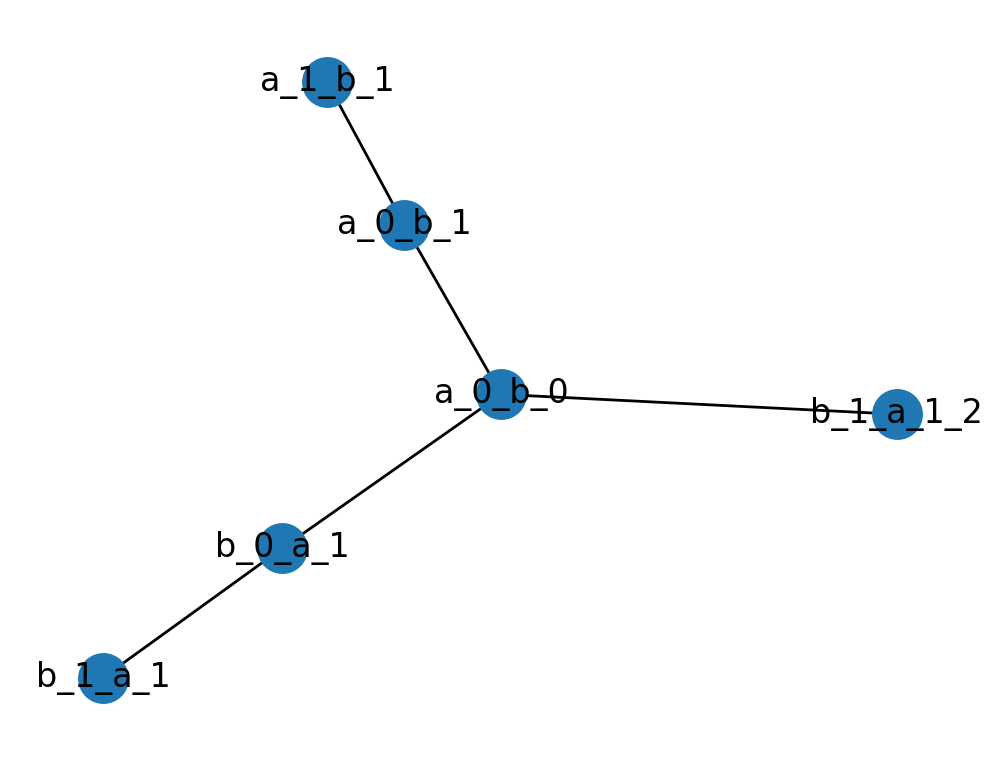

In [73]:
tree = {'a_0_b_0': {'b_0_a_1': {'b_1_a_1': {}}, 'a_0_b_1': {'a_1_b_1': {}}, 'b_1_a_1_2': {}}}
plot_tree(tree)

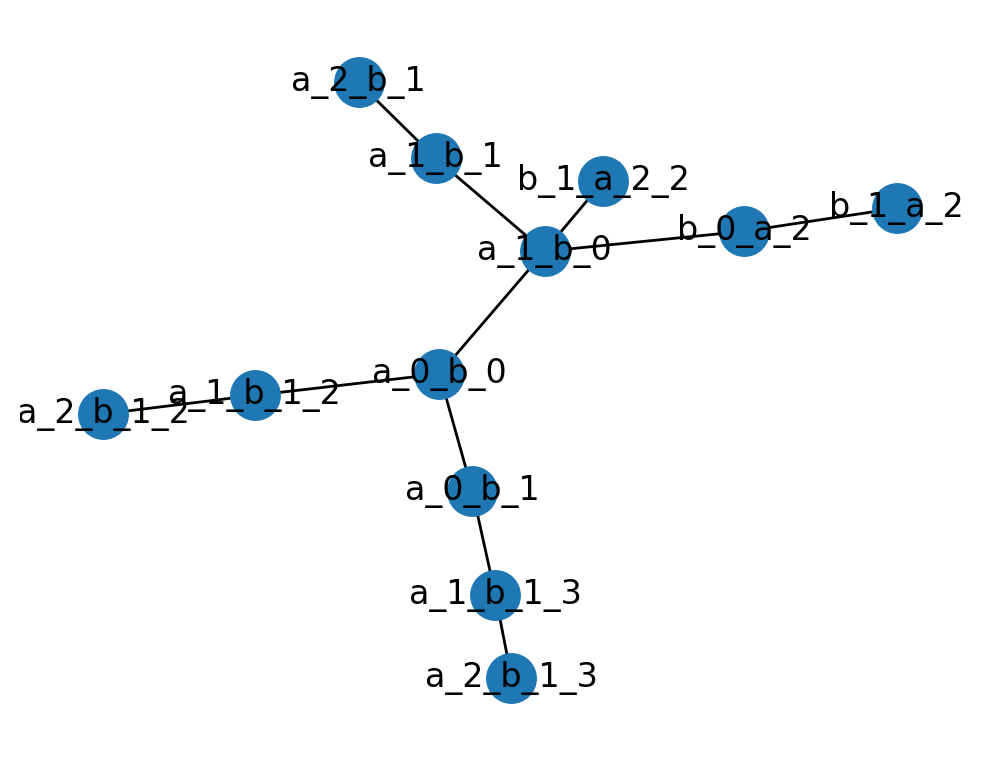

In [74]:
plot_tree(ThreexTwo.trees[0])

In [75]:
rename_nodes(K)
print(K.trees[0])

{'f_0_b_0': {'b_0_f_1': {'b_1_f_1': {}}, 'b_0_f_2': {'b_1_f_2': {}}, 'b_0_f_3': {'b_1_f_3': {}}, 'b_0_f_4': {'b_1_f_4': {}}, 'b_0_f_5': {'b_1_f_5': {}}, 'b_0_f_6': {'b_1_f_6': {}}, 'b_0_f_7': {'b_1_f_7': {}}, 'b_0_f_8': {'b_1_f_8': {}}, 'b_0_f_9': {'b_1_f_9': {}}, 'b_0_f_10': {'b_1_f_10': {}}, 'b_0_f_11': {'b_1_f_11': {}}, 'f_0_b_1': {'f_1_b_1': {}, 'f_2_b_1': {}, 'f_3_b_1': {}, 'f_4_b_1': {}, 'f_5_b_1': {}, 'f_6_b_1': {}, 'f_7_b_1': {}, 'f_8_b_1': {}, 'f_9_b_1': {}, 'f_10_b_1': {}, 'f_11_b_1': {}}, 'b_1_f_1_2': {}, 'b_1_f_2_2': {}, 'b_1_f_3_2': {}, 'b_1_f_4_2': {}, 'b_1_f_5_2': {}, 'b_1_f_6_2': {}, 'b_1_f_7_2': {}, 'b_1_f_8_2': {}, 'b_1_f_9_2': {}, 'b_1_f_10_2': {}, 'b_1_f_11_2': {}}}
